In [2]:
from sympy import *
import numpy as np

In [14]:
x = Symbol('x')

k_ex = 11

f = sin(k_ex * pi * x)

def Nl(l):
    return sin(pi * l * x)

In [15]:

# data matrix
M = [[0 for _ in range(10+1)] for _ in range(10)]


# Load vector

def L(v):
    return integrate(f*v, (x, 0, 1))

for l in range(1, 10+1):
    M[l-1][10] = L(Nl(l))# + 0.1

    
# Stiffness matrix

def a(u, v):
    return integrate(diff(u, x) * diff(v, x), (x, 0, 1))

for l in range(1, 10+1):
    for k in range(1, 10+1):
        M[l-1][k-1] = a(Nl(k), Nl(l))# + 0.1

for m in M:
    print(m)
    


[pi**2/2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2*pi**2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 9*pi**2/2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 8*pi**2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 25*pi**2/2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 18*pi**2, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 49*pi**2/2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 32*pi**2, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 81*pi**2/2, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 50*pi**2, 0]


In [16]:
M_mat = Matrix(M)

x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
x4 = Symbol('x4')
x5 = Symbol('x5')
x6 = Symbol('x6')
x7 = Symbol('x7')
x8 = Symbol('x8')
x9 = Symbol('x9')
x10 = Symbol('x10')
        
a = solve_linear_system(M_mat, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10)


u_h = a[x1] * Nl(1) + a[x2] * Nl(2) + a[x3] * Nl(3) + a[x4] * Nl(4) + \
    a[x5] * Nl(5) + a[x6] * Nl(6) + a[x7] * Nl(7) + a[x8] * Nl(8) + a[x9] * Nl(9) + a[x10] * Nl(10)
print(u_h)

0


u_ex =  sin(21*pi*x)/(441*pi**2)
L^2 error:  0.00016246009283966625
L^\infty error:  [0.00022975]


ValueError: x and y must have same first dimension, but have shapes (201,) and (1,)

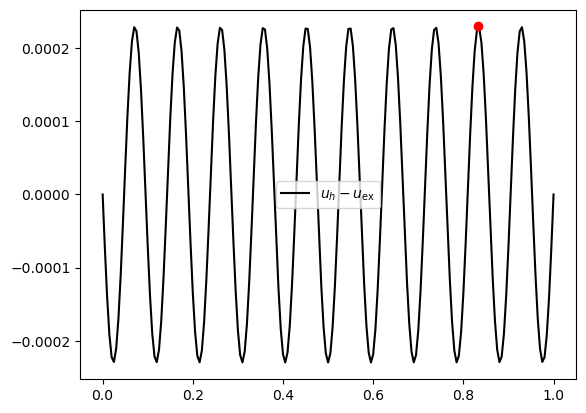

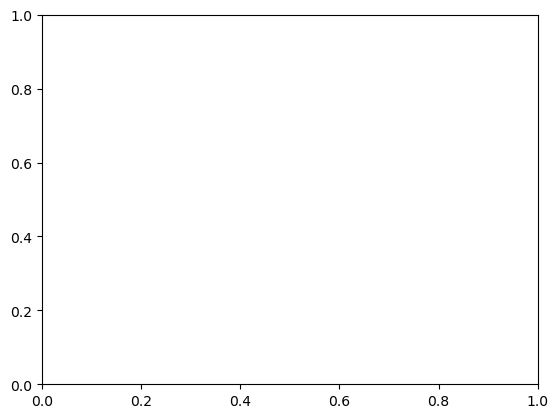

In [10]:

u_ex = sin(k_ex * pi * x) / ( pi**2 * k_ex**2 )

print("u_ex = ", u_ex)

f2 = lambdify(x, (u_h - u_ex)**2, "numpy")

from scipy.integrate import quadrature

L2err = np.sqrt(quadrature(f2, 0, 1, tol=1e-13)[0])

print("L^2 error: ", L2err)

f = lambdify(x, u_h - u_ex, "numpy")
fp = lambdify(x, diff(u_h - u_ex, x), "numpy")


from scipy.optimize import fsolve

ext_points = fsolve(fp, [0.95])

print("L^\infty error: ", f(ext_points))

import matplotlib.pyplot as plt

xx = np.linspace(0, 1, 201)

plt.figure()

plt.plot(xx, f(xx) + 0*xx, 'k-', label=r"$u_h - u_\mathrm{ex}$")
plt.plot(ext_points, f(ext_points), 'ro')
plt.legend()

u_h_f = lambdify(x, u_h, "numpy")
u_ex_f = lambdify(x, u_ex, "numpy")

plt.figure()

plt.plot(xx, u_h_f(xx), 'k:', label=r"$u_h$")
plt.plot(xx, u_ex_f(xx), 'k--', label=r"$u_\mathrm{ex}$")
plt.plot([ext_points[0], ext_points[0]], [u_h_f(ext_points[0]), u_ex_f(ext_points[0])], 
         'r-', label=r"$\mathrm{max } \; | u_h - u_\mathrm{ex} | $")
plt.legend()

plt.figure()

plt.plot(xx, u_h_f(xx), 'k:', label=r"$u_h$")
plt.plot(xx, u_ex_f(xx), 'k--', label=r"$u_\mathrm{ex}$")
plt.plot([ext_points[0], ext_points[0]], [u_h_f(ext_points[0]), u_ex_f(ext_points[0])], 
         'r-', label=r"$\mathrm{max } \; | u_h - u_\mathrm{ex} | $")
plt.xlim(0.9, 1.0)
plt.ylim(0.005, 0.0075)
plt.legend()
;
